In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# file path
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# create dataframes
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [30]:
# merge dataframes
mouse_raw_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# check counts
print(mouse_raw_df["Mouse ID"].value_counts())
print(len(mouse_raw_df["Mouse ID"]))


g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64
1893


In [31]:
# drop duplicates and store as clean df
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_df.drop_duplicates(subset=["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"], inplace=True, ignore_index=True)
mouse_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2
1888,z969,Naftisol,Male,9,30,30,65.841013,3
1889,z969,Naftisol,Male,9,30,35,69.176246,4
1890,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# check counts from clean df
print(mouse_df["Mouse ID"].value_counts())
print(len(mouse_df["Mouse ID"]))

g989    12
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64
1892


<AxesSubplot:xlabel='Drug Regimen'>

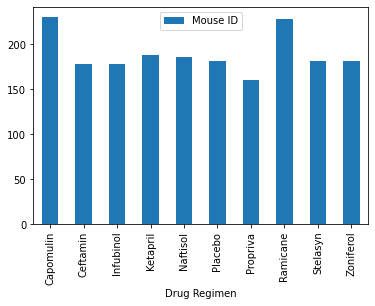

In [33]:
## use Pandas DataFrame.plot() to generate a bar plot 

drug_df = mouse_df[["Drug Regimen", "Mouse ID"]].set_index("Drug Regimen")
d_group = drug_df.groupby(["Drug Regimen"])
drug_regimen_by_count = pd.DataFrame(d_group["Mouse ID"].count())
drug_regimen_by_count

drug_regimen_by_count.plot(kind="bar", stacked=True)

In [34]:
## use .pyplot to chart a bar chart

d_df = mouse_df[["Drug Regimen", "Mouse ID"]]
group_df = mouse_df.groupby(["Drug Regimen"])
drug_regimen_series = group_df["Mouse ID"].count()

drug_regimen_df = pd.DataFrame(drug_regimen_series).reset_index()
drug_regimen_df



,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,160
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


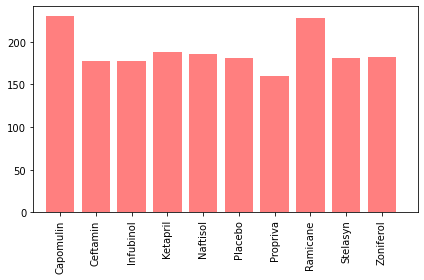

In [35]:
x_axis = np.arange(len(drug_regimen_series))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, drug_regimen_df["Mouse ID"], color='r', alpha=0.5, align='center')
plt.xticks(tick_locations, drug_regimen_df["Drug Regimen"], rotation="vertical")
plt.xlim(-0.75, len(drug_regimen_df))
plt.tight_layout()

In [36]:
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2
1888,z969,Naftisol,Male,9,30,30,65.841013,3
1889,z969,Naftisol,Male,9,30,35,69.176246,4
1890,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
# generate pie plot for distribution by sex of ID using DataFrame.plot
df_copy = mouse_df.copy()
df_copy.drop_duplicates(subset=["Mouse ID", "Sex"], inplace=True, ignore_index=True)
groupby_sex = df_copy[["Mouse ID", "Sex"]].groupby("Sex")
sex_count_series = groupby_sex["Mouse ID"].count()
ID_sex_df = pd.DataFrame(sex_count_series)
ID_sex_df



,Mouse ID
Sex,
Female,124
Male,125


In [38]:
promsing_treatments_df = mouse_df.loc[(mouse_df["Drug Regimen"] == "Capomulin") | (mouse_df["Drug Regimen"] == "Ramicane") | (mouse_df["Drug Regimen"] == "Infubinol") | (mouse_df["Drug Regimen"] == "Ceftamin"), ["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
group_treatment = promsing_treatments_df.groupby(["Drug Regimen", "Mouse ID"])
tumor_vol = group_treatment["Tumor Volume (mm3)"].sum()
tumor_vol_df = pd.DataFrame(tumor_vol)

quartiles = tumor_vol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
middleq = quartiles[0.50]

# IQR
iqr = upperq-lowerq

# bounds
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f'lower quartile: {lowerq}')
print(f'middle quartile: {middleq}')
print(f'upper quartile: {upperq}')
print(f'iqr: {iqr}')
print(f'lower bound: {lower_bound}')
print(f'upper bound: {upper_bound}')
promsing_treatments_df

print(tumor_vol_df["Tumor Volume (mm3)"].max())
print(tumor_vol_df["Tumor Volume (mm3)"].min())

lower quartile: 340.0010610275
middle quartile: 394.845840265
upper quartile: 449.984559655
iqr: 109.98349862750001
lower bound: 175.02581308624997
upper bound: 614.95980759625
587.4094294700001
45.0


In [39]:
# construct outlier dataframe to identify outlier items
outlier_IDs_df = tumor_vol_df.loc[(tumor_vol_df["Tumor Volume (mm3)"] < upper_bound) | (tumor_vol_df["Tumor Volume (mm3)"] > lower_bound)]
outlier_IDs_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128              419.636356
             b742              400.836993
             f966              182.529864
             g288              419.900966
             g316              446.133439
...                                   ...
Ramicane     s508              360.501562
             u196              455.763948
             w678               88.166373
             y449              181.439088
             z578              384.115100

[100 rows x 1 columns]

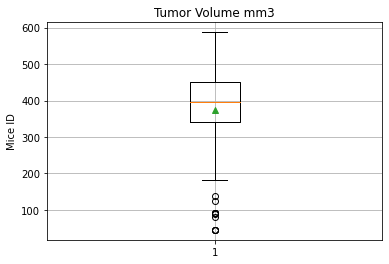

In [40]:
# box and whisker plot for outliers in promising treatments
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume mm3')
ax1.set_ylabel('Mice ID')
plt.boxplot(tumor_vol_df["Tumor Volume (mm3)"], showmeans=True)
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Tumor Volume (mm3)')

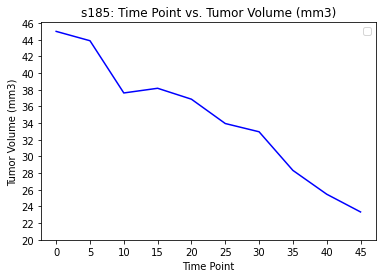

In [41]:
# generate line plot of tumor volume vs time point
id_cap_treatment = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin", ["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

ran_id = id_cap_treatment.loc[id_cap_treatment["Mouse ID"] == "s185", ["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]].set_index("Mouse ID")

plt.plot(ran_id["Timepoint"], ran_id["Tumor Volume (mm3)"], color="blue")
plt.legend(loc="best")
plt.title("s185: Time Point vs. Tumor Volume (mm3)")
plt.yticks(np.arange(min(ran_id["Tumor Volume (mm3)"]) -3.34, max(ran_id["Tumor Volume (mm3)"]) + 1.5, 2.0))
plt.xticks(np.arange(min(ran_id["Timepoint"]), max(ran_id["Timepoint"]) + 1, 5.0))
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

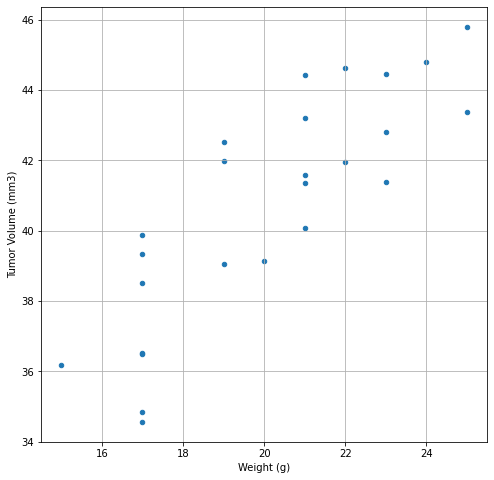

In [42]:
# generate scatter plot of mouse weight vs. average tumor volume for the Capomulin treatment regimen

capomulin_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin", ["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
cap_group = capomulin_df.groupby(["Mouse ID", "Weight (g)"])
cap_group_ave = cap_group["Tumor Volume (mm3)"].mean()

ave_vol_vs_weight_df = pd.DataFrame(cap_group_ave).reset_index()
ave_vol_vs_weight_df.set_index("Mouse ID")

ave_vol_vs_weight_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8))
